# FIN 514 - PS4 Q1 CRR
**Spring 2022**



In [5]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt

In [6]:
# input parameters

start_step = 50
N = 1000
S0 = 100.0
K = 105.0
sigma = 0.3
r = 0.04 
T = 0.5 
q = 0 # dividend rate
exact = 10.37597  #from part 1_a) 

## 1_b)
### CRR Function

In [7]:

def CRR_fun(S0, K, T, r, sigma, start_step, N):
      
    
    # LIST TO SAVE RESULTS
    crr_result = []
        
    # CREATE TWO DIMENSIONAL ARRAY OF SIZE [N+1,N+1] TO STORE ALL STEPS

    option_value = np.zeros([N+1, N+1])
    stock_value = np.zeros([N+1, N+1])    
    
    # FOR LOOP STATEMENT: For a Binomial Tree from start_step to N
    for n in range(start_step, N+1):
        delta = T / n
        u = np.exp(sigma * (delta)**0.5)
        d = 1 / u
        qu = (np.exp(r * delta) - d) / (u - d)
        qd = 1 - qu
        
    # CALCULATE OPTION VALUES AT CERTAIN STEPS AND POSITIONS WITHIN THE BINOMIAL TREE:
        j = n 
        
        for i in range(0, j):    
            stock_value[j, i] = S0 * (u**i) * (d**(j - i))
            option_value[j, i] = np.maximum(K - stock_value[j, i], 0)

        for j in range(n-1, -1, -1):
            for i in range(j, -1, -1):
                stock_value[j, i] = S0 * (u**i) * (d**(j - i))
                pv = np.exp(-r * delta) * (qu * option_value[j + 1, i + 1] + qd * option_value[j + 1, i])
                option_value[j, i] = np.maximum(pv, K - stock_value[j, i])
    # RELAY OUTPUTS TO DICTIONARY
        output = {'num_steps': n, 'CRR': option_value[0,0]}
        crr_result.append(output)

    return crr_result


In [18]:
crr = CRR_fun(S0, K, T, r, sigma, start_step, N)

In [19]:
# CREATE A DATAFRAME FROM THE BINOMIAL MODEL OUTPUT
df = pd.DataFrame.from_dict(crr)
df

,num_steps,CRR
0,50,10.385411
1,51,10.410584
2,52,10.382350
3,53,10.410497
4,54,10.379455
...,...,...
946,996,10.377814
947,997,10.376344
948,998,10.377796
949,999,10.376379


In [20]:
# comparing the model with our best binomial model with large N = 9999
df['error_CRR'] = df["CRR"] - exact 
df.to_csv("PS4_Q1_CRR", index=False)
df

,num_steps,CRR,error_CRR
0,50,10.385411,0.009441
1,51,10.410584,0.034614
2,52,10.382350,0.006380
3,53,10.410497,0.034527
4,54,10.379455,0.003485
...,...,...,...
946,996,10.377814,0.001844
947,997,10.376344,0.000374
948,998,10.377796,0.001826
949,999,10.376379,0.000409


### CRR Error Rate

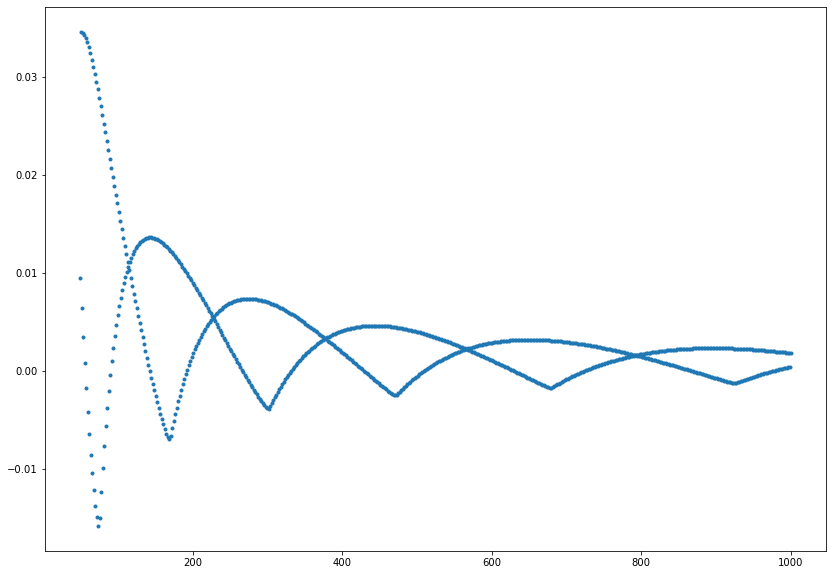

In [21]:
plt.figure(figsize=(14,10))
plt.plot(df['num_steps'], df['error_CRR'], 'o', markersize=3)
plt.savefig('PS4_Q1_CRR')
plt.show()

BD


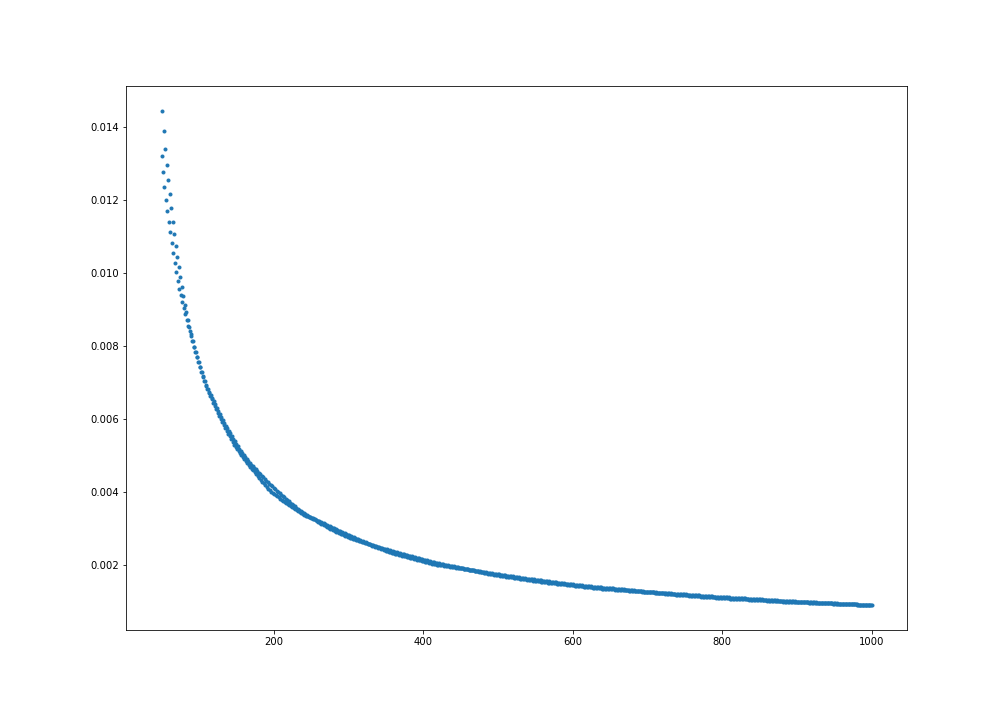

In [30]:
from PIL import Image
img1 = Image.open("PS4_Q1_BD.png")
print("BD")
img1

LR


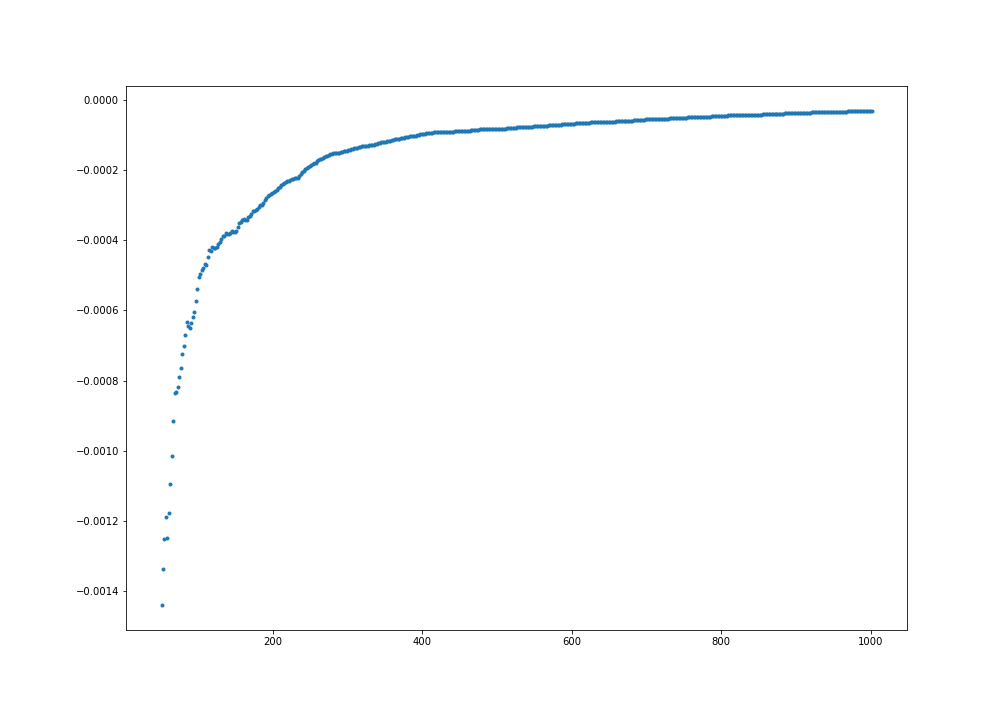

In [31]:
img2 = Image.open("PS4_Q1_LR.png")
print("LR")
img2

## Comparision of models CRR, LR and BD: 

we can observe that LR and BD has reduced the non linearity and the curves are more smoother compared to CRR model

# 1_c

In [32]:
def CRR_fun_exb(S0, K, T, r, sigma, start_step, N):
    
    # LIST TO SAVE RESULTS
    crrexb_result = []
        
    # CREATE TWO DIMENSIONAL ARRAY OF SIZE [N+1,N+1] TO STORE ALL STEPS
    option_value = np.zeros([N+1, N+1])
    stock_value = np.zeros([N+1, N+1])    
    ex_boundary = np.zeros([N+1])
    
    # FOR LOOP STATEMENT: For a Binomial Tree from start_step to N
    for n in range(start_step, N+1):
        delta = T / n
        u = np.exp(sigma * (delta)**0.5)
        d = 1 / u
        qu = (np.exp(r * delta) - d) / (u - d)
        qd = 1 - qu
        
    # CALCULATE OPTION VALUES AT CERTAIN STEPS AND POSITIONS WITHIN THE BINOMIAL TREE:
        j = n 
        ex_boundary[j] = K
        output = {'time': j*delta, 'Boundary': ex_boundary[j]}
        crrexb_result.append(output)
        for i in range(0, j):    
            stock_value[j, i] = S0 * (u**i) * (d**(j - i))
            option_value[j, i] = np.maximum(K - stock_value[j, i], 0)

        for j in range(n-1, -1, -1):
            ex_boundary[j] = 0
            for i in range(0, j+1, 1):  
                stock_value[j, i] = S0 * (u**i) * (d**(j - i))
                pv = np.exp(-r * delta) * (qu * option_value[j + 1, i + 1] + qd * option_value[j + 1, i])
                if (pv < K - stock_value[j, i]):
                    ex_boundary[j] = stock_value[j, i]
                option_value[j, i] = np.maximum(pv, K - stock_value[j, i])
    # RELAY OUTPUTS TO DICTIONARY
            output = {'time': j*delta, 'Boundary': ex_boundary[j]}
            crrexb_result.append(output)

    return crrexb_result


In [33]:
crr_exb = CRR_fun_exb(S0, K, T, r, sigma, 100, 100)

In [34]:
df2 = pd.DataFrame.from_dict(crr_exb)
df2


,time,Boundary
0,0.500,105.000000
1,0.495,102.143980
2,0.490,100.000000
3,0.485,97.901021
4,0.480,95.846100
...,...,...
96,0.020,0.000000
97,0.015,0.000000
98,0.010,0.000000
99,0.005,0.000000


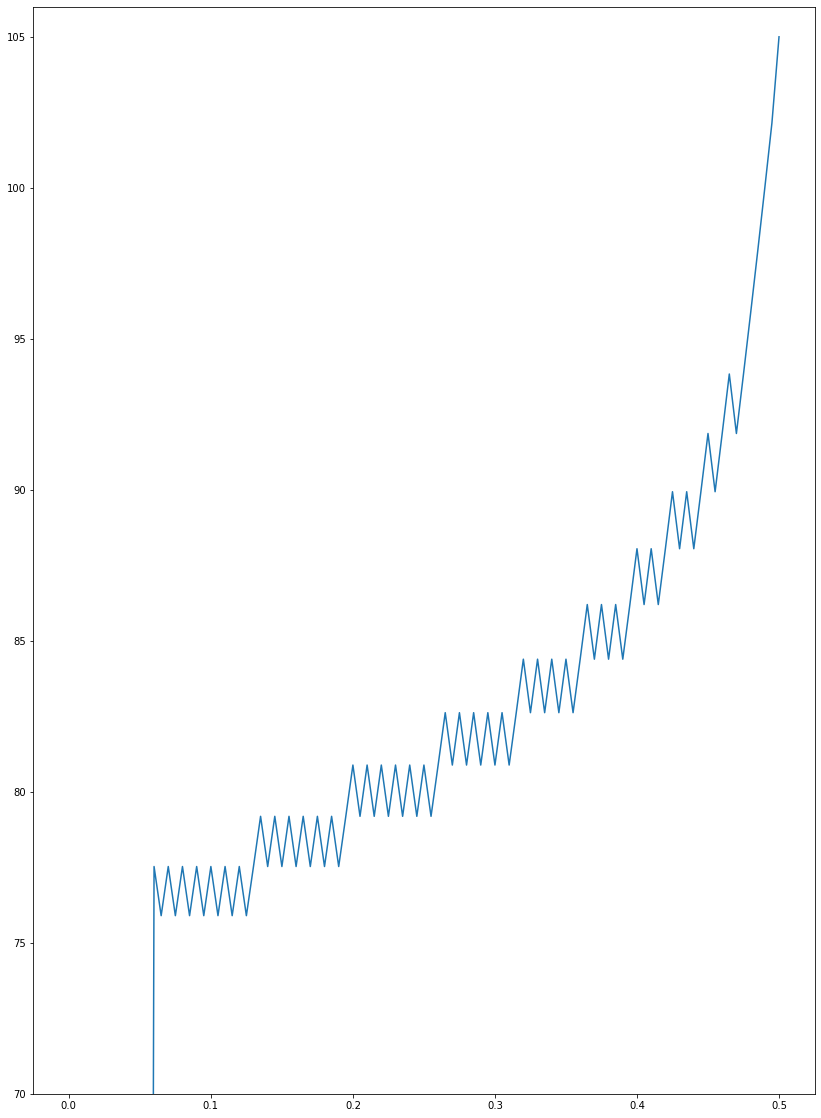

In [35]:
plt.figure(figsize=(14,20))
plt.ylim(70,106)
plt.plot(df2['time'], df2['Boundary'], markersize=3)
plt.savefig('PS4_Q1_CRR_exb')
plt.show()

#### *No, the theoritical curve is expected to be smooth; from the above graph we can observe that the boundary curve is cerrated where we notice that the prices of later periods are lower which is not expected and we also notice that there are intermittent jumps at some time points, thus resulting in poor prediction accuracies *